# Scope

1. Mathematical Operations, Printing Variables, Using Chempy Library
2. Functions
3. Plotting
4. Fitting
5. Retrieve Stored Data

## 1. Mathematical Operations, Printing Variables, Using Chempy Library


### 1a. Example: SOLUTIONS
A 100.0 g sample of ice at 0°C is mixed with 5.00 g of sodium chloride (NaCl). Calculate the change in the freezing point of the ice. Assume that the ice behaves as water and the molal freezing point depression constant (Kf) for water is 1.86 °C·kg/mol. The van't Hoff factor (𝑖) for NaCl is 2.

In [ ]:
#!pip install chempy #install chempy if needed - do this once

from chempy import Substance

# Create an NaCl substance object
substance_NaCl = Substance.from_formula('NaCl')

# Get molar mass
mm_NaCl = substance_NaCl.molar_mass()

#define constants:
Kf = 1.86 #°C·kg/mol
i = 2 #van't Hoff factor
mass_NaCl_g = 5.00 #g
mass_ice_kg = 100.0/1000 #kg

#calculate moles of NaCl
moles_NaCl = mass_NaCl_g / mm_NaCl.magnitude
#calculate molality of NaCl
molality_NaCl = moles_NaCl / mass_ice_kg

#calculate freezing point depression with ΔTf = Kf x m x i
delta_Tf = Kf * molality_NaCl * i

#calculate freezing point:
Tf_mixture = 100 - delta_Tf

print("The freezing point depression of a 100 g ice containing 5 g NaCl is %s °C. The freezing point of the mixture is: %s °C" %(round(delta_Tf,2), round(Tf_mixture,2)))

The freezing point depression of a 100 g ice containing 5 g NaCl is 3.18 °C. The freezing point of the mixture is: 96.82 °C


### 1b. Do it yourself
A 150.0 g sample of ice at 0°C is mixed with 8.00 g of calcium chloride (CaCl₂). Calculate the change in the freezing point of the ice. Assume that the ice behaves as water and the molal freezing point depression constant (Kf) for water is 1.86 °C·kg/mol. The van't Hoff factor (𝑖) for CaCl₂ is 3.

The freezing point depression of a 100.0 g ice containing 5.0 g NaCl is 3.18 °C. The freezing point of the mixture is: -3.18 °C


## 2. Functions


### 2a. Example: Functionalize the above example on the calculation of the freezing point of ice with the addition of NaCl.

In [ ]:
from chempy import Substance

def calculate_freezing_point_depression(salt_formula, mass_salt_g, mass_solvent_g, Kf=1.86, i=2):
    """
    Calculate the freezing point depression of a solution.

    Parameters:
    - salt_formula: str, the chemical formula of the salt (e.g., 'NaCl', 'CaCl2')
    - mass_salt_g: float, mass of the salt in grams
    - mass_solvent_g: float, mass of the solvent in grams
    - Kf: float, molal freezing point depression constant (default is 1.86 °C·kg/mol for water)
    - i: int, van't Hoff factor (default is 2 for NaCl, 3 for CaCl2)

    Returns:
    - delta_Tf: float, freezing point depression in °C
    - Tf_mixture: float, new freezing point of the mixture in °C
    """

    # Create a substance object for the salt
    substance = Substance.from_formula(salt_formula)

    # Get molar mass of the salt
    mm_salt = substance.molar_mass()

    # Convert mass of solvent to kg
    mass_solvent_kg = mass_solvent_g / 1000

    # Calculate moles of salt
    moles_salt = mass_salt_g / mm_salt.magnitude

    # Calculate molality of the solution (mol/kg)
    molality_salt = moles_salt / mass_solvent_kg

    # Calculate the freezing point depression: ΔTf = Kf x m x i
    delta_Tf = Kf * molality_salt * i

    # Calculate the new freezing point of the mixture
    Tf_mixture = 0 - delta_Tf  # since the initial freezing point of water is 0°C

    return round(delta_Tf, 2), round(Tf_mixture, 2)


# Example usage:
salt_formula = 'NaCl'
mass_salt_g = 5.00  # grams of NaCl
mass_solvent_g = 100.0  # grams of ice

delta_Tf, Tf_mixture = calculate_freezing_point_depression(salt_formula, mass_salt_g, mass_solvent_g)

print(f"The freezing point depression of a {mass_solvent_g} g ice containing {mass_salt_g} g {salt_formula} is {delta_Tf} °C. The freezing point of the mixture is: {Tf_mixture} °C")

### 2b. Do it yourself: Functionalize the above example on the calculation of the freezing point of ice with the addition of CaCl₂.

## 3. Plotting: CHEMICAL KINETICS


### 3a. Example

Given the following set of calculated values for the reaction rates of the decomposition of hydrogen peroxide, complete the following:

a. Generate a table consisting of temperature (T in °C), reaction rate constant (k), and the natural logarithm of the reaction rate constant (ln(k)).
b. Plot 1/T (in Kelvin) versus 𝑘 to observe the relationship.

Dataset:
- Temperature (T, °C): 0.0, 5.55555556, 11.11111111, 16.66666667, 22.22222222, 27.77777778, 33.33333333, 38.88888889, 44.44444444, 50.0

- Reaction rate constant (k): 0.0435889, 0.10254397, 0.19861553, 0.29297953, 0.63305889, 1.25410921, 1.8739089, 3.53913917, 3.71370234, 7.28617176

In [ ]:
#(a) Generate table

import pandas as pd
import numpy as np

# Create a DataFrame
df = pd.DataFrame({
    "T (C)": [ 0.0, 5.55555556, 11.11111111, 16.66666667, 22.22222222, 27.77777778, 33.33333333, 38.88888889, 44.44444444, 50.0],
    "k": [0.0435889, 0.10254397, 0.19861553, 0.29297953, 0.63305889, 1.25410921, 1.8739089, 3.53913917, 3.71370234, 7.28617176]
})

# Convert temperature from Celsius to Kelvin and calculate 1/T
df["1/T (K)"] = 1 / (df["T (C)"] + 273.15)

# Calculate the natural logarithm of k
df["ln_k"] = np.log(df["k"])

# Display the DataFrame
df.head()


,T (C),k,1/T (K),ln_k
0,0.000000,0.043589,0.003661,-3.132953
1,5.555556,0.102544,0.003588,-2.277464
2,11.111111,0.198616,0.003518,-1.616384
3,16.666667,0.292980,0.003450,-1.227653
4,22.222222,0.633059,0.003386,-0.457192


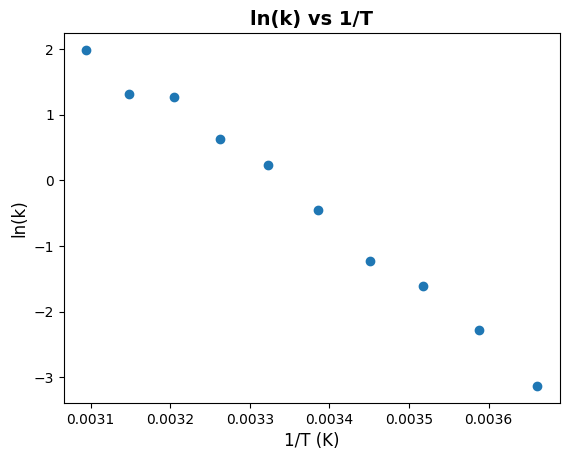

In [ ]:
# (b). Plot data

import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(df["1/T (K)"], df["ln_k"])

plt.xlabel("1/T (K)", fontsize=12)
plt.ylabel("ln(k)", fontsize=12)
plt.title("ln(k) vs 1/T", fontweight="bold", fontsize=14)

plt.show()

### 3b. Do it yourself, but this time use the following dataset.

- Temperature (T, °C): 0.0, 5.55555556, 11.11111111, 16.66666667, 22.22222222, 27.77777778, 33.33333333, 38.88888889, 44.44444444, 50.0

- Reaction rate constant (k): 716.00589111, 724.40605367, 931.30171197, 1769.122-69634, 1790.40353274, 2793.98814359, 2723.77412272, 5753.03377506, 4553.97173516, 9514.18898672


## 4. Fitting


### 4a. Example: Fit the example plot you have generated in the above to a linear equation and derive the activation energy.

In [ ]:
from scipy import constants

# Fit the data to a linear model: ln(k) = m * (1/T) + b
slope, intercept = np.polyfit(df["1/T (K)"], df["ln_k"], 1)
Ea = -slope * constants.R  # Activation energy in J/mol

# Print the fitted slope
print(f"Fitted equation: ln(k) = {round(slope, 2)} * (1/T) + {round(intercept, 2)}")
print("The activation energy is, Ea: %s J/mol" %(round(Ea,2)))

Fitted equation: ln(k) = -8883.08 * (1/T) + 29.55
The activation energy is, Ea: 73858.01 J/mol


### 4b. Do it yourself: Fit the plot you have generated in the above to a linear equation and derive the activation energy.

## 5. Conditional Statements

### 5a. Example:

Given the following chemical kinetics dataset, write a function to determine if the reaction is zeroth, first, or second order.

Dataset
- time = 0.0, 52.63157895, 105.26315789, 157.89473684, 210.52631579, 263.15789474, 315.78947368, 368.42105263, 421.05263158, 473.68421053, 526.31578947, 578.94736842, 631.57894737, 684.21052632, 736.84210526, 789.47368421, 842.10526316, 894.73684211, 947.36842105, 1000.0

- concentration = 1.0, 0.15966387, 0.08675799, 0.05956113, 0.04534606, 0.03660886, 0.03069467, 0.02642559, 0.02319902, 0.02067465, 0.01864573, 0.01697945, 0.01558655, 0.01440485, 0.01338971, 0.01250823, 0.01173564, 0.01105294, 0.0104453, 0.00990099


Fitted Second Order Equation: 1/[A] = 0.1000 * t + 1.0000


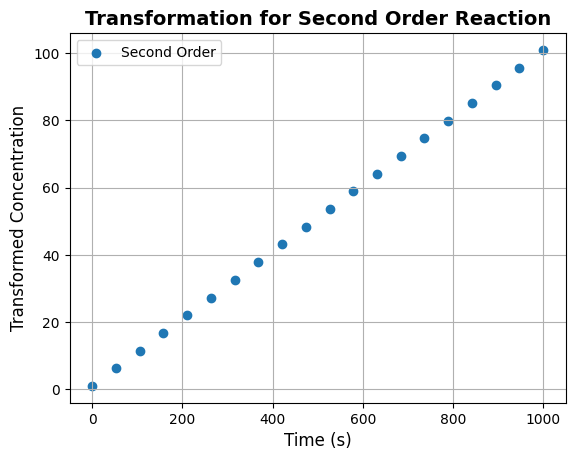

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def analyze_reaction(time, concentration):
    # Convert the lists to numpy arrays for easy manipulation
    time = np.array(time)
    concentration = np.array(concentration)

    # Calculate the transformations for the three possible reaction orders
    zero_order = concentration
    first_order = np.log(concentration)
    second_order = 1 / concentration

    # Fit the data to a linear model and determine the order of the reaction
    # For zeroth-order: y = [A]
    slope_zeroth, intercept_zeroth, r_value_zeroth, p_value_zeroth, std_err_zeroth = stats.linregress(time, zero_order)

    # For first-order: y = ln([A])
    slope_first, intercept_first, r_value_first, p_value_first, std_err_first = stats.linregress(time, first_order)

    # For second-order: y = 1/[A]
    slope_second, intercept_second, r_value_second, p_value_second, std_err_second = stats.linregress(time, second_order)

    # Determine which reaction order fits best
    if r_value_zeroth**2 > r_value_first**2 and r_value_zeroth**2 > r_value_second**2:
        order = "Zeroth"
        plt.plot(time, zero_order, label="Zeroth Order")
        print(f"Fitted Zeroth Order Equation: [A] = {slope_zeroth:.4f} * t + {intercept_zeroth:.4f}")

    elif r_value_first**2 > r_value_zeroth**2 and r_value_first**2 > r_value_second**2:
        order = "First"
        plt.plot(time, first_order, label="First Order")
        print(f"Fitted First Order Equation: ln([A]) = {slope_first:.4f} * t + {intercept_first:.4f}")

    else:
        order = "Second"
        plt.scatter(time, second_order, label="Second Order")
        print(f"Fitted Second Order Equation: 1/[A] = {slope_second:.4f} * t + {intercept_second:.4f}")

    # Plotting the data
    plt.xlabel("Time (s)", fontsize=12)
    plt.ylabel("Transformed Concentration", fontsize=12)
    plt.title(f"Transformation for {order} Order Reaction", fontweight="bold", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Check order of reaction
time = [0.0, 52.63157895, 105.26315789, 157.89473684, 210.52631579,
        263.15789474, 315.78947368, 368.42105263, 421.05263158,
        473.68421053, 526.31578947, 578.94736842, 631.57894737,
        684.21052632, 736.84210526, 789.47368421, 842.10526316,
        894.73684211, 947.36842105, 1000.0]

concentration = [1.0, 0.15966387, 0.08675799, 0.05956113, 0.04534606,
                 0.03660886, 0.03069467, 0.02642559, 0.02319902, 0.02067465,
                 0.01864573, 0.01697945, 0.01558655, 0.01440485, 0.01338971,
                 0.01250823, 0.01173564, 0.01105294, 0.0104453, 0.00990099]

# Call the function to analyze the reaction and plot the results
analyze_reaction(time, concentration)


### 5b. Do it yourself

Given the following chemical kinetics dataset, write a function to determine if the reaction is zeroth, first, or second order.

Dataset
- time = 0.0, 52.63157895, 105.26315789, 157.89473684, 210.52631579, 263.15789474, 315.78947368, 368.42105263, 421.05263158, 473.68421053, 526.31578947, 578.94736842, 631.57894737, 684.21052632, 736.84210526, 789.47368421, 842.10526316, 894.73684211, 947.36842105, 1000.0

- concentration = 1.00000000e+00, 5.17892437e-03, 2.68212576e-05, 1.38905265e-07, 7.19379861e-10, 3.72561389e-12, 1.92946726e-14, 9.99256501e-17, 5.17507385e-19, 2.68013161e-21, 1.38801989e-23, 7.18845003e-26, 3.72284391e-28, 1.92803270e-30, 9.98513555e-33, 5.17122619e-35, 2.67813893e-37, 1.38698790e-39, 7.18310543e-42, 3.72007598e-44


Fitted First Order Equation: ln([A]) = -0.1000 * t + -0.0000


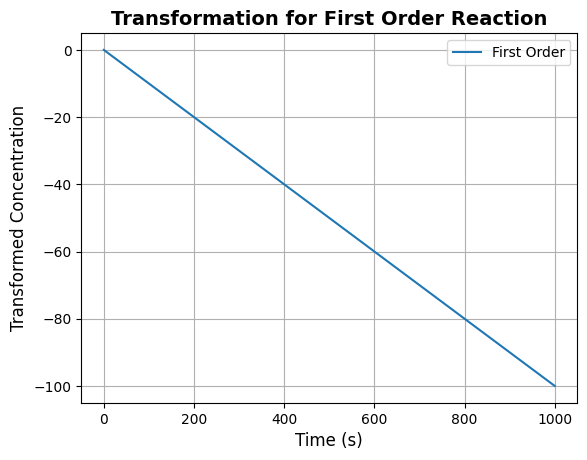

In [ ]:
# Check order of reaction
time = [0.0, 52.63157895, 105.26315789, 157.89473684, 210.52631579, 263.15789474, 315.78947368, 368.42105263, 421.05263158, 473.68421053, 526.31578947, 578.94736842, 631.57894737, 684.21052632, 736.84210526, 789.47368421, 842.10526316, 894.73684211, 947.36842105, 1000.0]

concentration = [1.00000000e+00, 5.17892437e-03, 2.68212576e-05, 1.38905265e-07, 7.19379861e-10, 3.72561389e-12, 1.92946726e-14, 9.99256501e-17, 5.17507385e-19, 2.68013161e-21, 1.38801989e-23, 7.18845003e-26, 3.72284391e-28, 1.92803270e-30, 9.98513555e-33, 5.17122619e-35, 2.67813893e-37, 1.38698790e-39, 7.18310543e-42, 3.72007598e-44]

# Call the function to analyze the reaction and plot the results
analyze_reaction(time, concentration)

***

Appendix A: Generate fake arrhenius dataset

[ 0.          5.55555556 11.11111111 16.66666667 22.22222222 27.77777778
 33.33333333 38.88888889 44.44444444 50.        ]
[ 716.00589111  724.40605367  931.30171197 1769.12269634 1790.40353274
 2793.98814359 2723.77412272 5753.03377506 4553.97173516 9514.18898672]


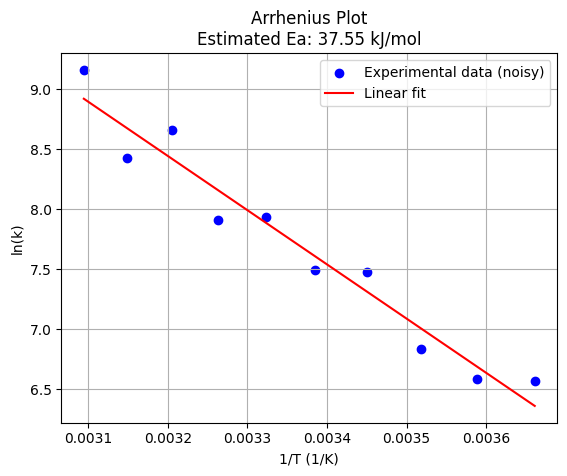

Estimated Activation Energy (Ea): 37.55 kJ/mol


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Constants
R = 8.314  # J/mol·K (gas constant)

# Given parameters
Ea = 38_000  # Activation energy in J/mol (approximately)
A = 1e10     # Pre-exponential factor (arbitrary, in s^-1)

# Generate fake experimental temperatures in Celsius
temps_celsius = np.linspace(0, 50, 10)  # 20 points between 0°C and 100°C
temps_kelvin = temps_celsius + 273.15     # Convert to Kelvin

# Generate reaction rate constants using the Arrhenius equation, with added noise
ln_k_true = np.log(A) - (Ea / R) * (1 / temps_kelvin)

mean = 0
std_dev = 0.15
ln_k_noisy = ln_k_true + np.random.normal(mean, std_dev, size=ln_k_true.shape)  # Adding some noise

print(temps_celsius)
print(np.exp(ln_k_noisy))

# Perform linear regression on ln(k) vs 1/T
inverse_temps = 1 / temps_kelvin
slope, intercept, r_value, p_value, std_err = stats.linregress(inverse_temps, ln_k_noisy)

# Calculate the activation energy from the slope
Ea_estimated = -slope * R  # Ea = -slope * R

# Plot the data
plt.scatter(inverse_temps, ln_k_noisy, label="Experimental data (noisy)", color='blue')
plt.plot(inverse_temps, intercept + slope * inverse_temps, label="Linear fit", color='red')

# Labels and title
plt.xlabel('1/T (1/K)')
plt.ylabel('ln(k)')
plt.title(f"Arrhenius Plot\nEstimated Ea: {Ea_estimated/1000:.2f} kJ/mol")
plt.legend()
plt.grid(True)
plt.show()

# Print the activation energy derived from the fit
print(f"Estimated Activation Energy (Ea): {Ea_estimated/1000:.2f} kJ/mol")


Appendix B: Generate a fake second order kinetics data

[   0.           52.63157895  105.26315789  157.89473684  210.52631579
  263.15789474  315.78947368  368.42105263  421.05263158  473.68421053
  526.31578947  578.94736842  631.57894737  684.21052632  736.84210526
  789.47368421  842.10526316  894.73684211  947.36842105 1000.        ]
[1.         0.15966387 0.08675799 0.05956113 0.04534606 0.03660886
 0.03069467 0.02642559 0.02319902 0.02067465 0.01864573 0.01697945
 0.01558655 0.01440485 0.01338971 0.01250823 0.01173564 0.01105294
 0.0104453  0.00990099]
       Time (s)  Concentration of A (M)
0      0.000000                1.000000
1     52.631579                0.159664
2    105.263158                0.086758
3    157.894737                0.059561
4    210.526316                0.045346
5    263.157895                0.036609
6    315.789474                0.030695
7    368.421053                0.026426
8    421.052632                0.023199
9    473.684211                0.020675
10   526.315789                0.018646
11   578.9

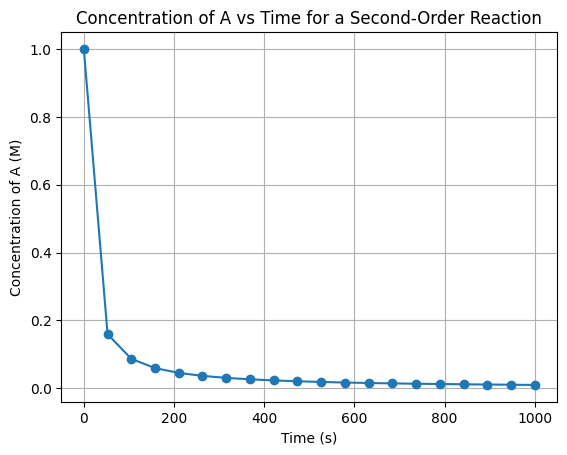

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for the second-order reaction
A0 = 1.0  # initial concentration in M
k = 0.1  # rate constant in M^-1 s^-1
time_duration = 1000  # total time in seconds
time_points = np.linspace(0, time_duration, num=20)  # time from 0 to 1000 seconds, 20 points

# Calculate the concentration of A at each time point for a second-order reaction
# [A] = 1 / (1/[A0] + kt)
concentration_A = 1 / (1/A0 + k * time_points)

# Create a DataFrame to organize the data
df = pd.DataFrame({
    'Time (s)': time_points,
    'Concentration of A (M)': concentration_A
})

print(time_points)
print(concentration_A)

# Show the dataset
print(df)

# Plot the data
plt.plot(df['Time (s)'], df['Concentration of A (M)'], marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Concentration of A (M)')
plt.title('Concentration of A vs Time for a Second-Order Reaction')
plt.grid(True)
plt.show()


Generate a first order kinetics data

[   0.           52.63157895  105.26315789  157.89473684  210.52631579
  263.15789474  315.78947368  368.42105263  421.05263158  473.68421053
  526.31578947  578.94736842  631.57894737  684.21052632  736.84210526
  789.47368421  842.10526316  894.73684211  947.36842105 1000.        ]
[1.00000000e+00 5.17892437e-03 2.68212576e-05 1.38905265e-07
 7.19379861e-10 3.72561389e-12 1.92946726e-14 9.99256501e-17
 5.17507385e-19 2.68013161e-21 1.38801989e-23 7.18845003e-26
 3.72284391e-28 1.92803270e-30 9.98513555e-33 5.17122619e-35
 2.67813893e-37 1.38698790e-39 7.18310543e-42 3.72007598e-44]
       Time (s)  Concentration of A (M)
0      0.000000            1.000000e+00
1     52.631579            5.178924e-03
2    105.263158            2.682126e-05
3    157.894737            1.389053e-07
4    210.526316            7.193799e-10
5    263.157895            3.725614e-12
6    315.789474            1.929467e-14
7    368.421053            9.992565e-17
8    421.052632            5.175074e-19
9    473.

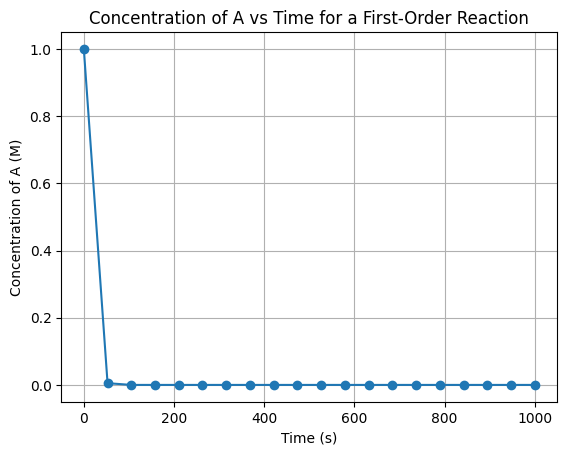

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for the first-order reaction
A0 = 1.0  # initial concentration in M
k = 0.1  # rate constant in s^-1
time_duration = 1000  # total time in seconds
time_points = np.linspace(0, time_duration, num=20)  # time from 0 to 1000 seconds, 20 points

# Calculate the concentration of A at each time point for a first-order reaction
# [A] = A0 * exp(-kt)
concentration_A = A0 * np.exp(-k * time_points)

# Create a DataFrame to organize the data
df = pd.DataFrame({
    'Time (s)': time_points,
    'Concentration of A (M)': concentration_A
})

print(time_points)
print(concentration_A)

# Show the dataset
print(df)

# Plot the data
plt.plot(df['Time (s)'], df['Concentration of A (M)'], marker='o')
plt.xlabel('Time (s)')
plt.ylabel('Concentration of A (M)')
plt.title('Concentration of A vs Time for a First-Order Reaction')
plt.grid(True)
plt.show()
